In [7]:
import os
import cv2
import numpy as np
from tqdm import tqdm

REBUILD_DATA = True

In [12]:
class DogsVSCats():
    IMG_SIZE = 50
    CATS = 'PetImages/Cat'
    DOGS = 'PetImages/Dog'
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []
    catcount = 0
    dogcount = 0
    
    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                try:
                    path = os.path.join(label, f)
                    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                    self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])

                    if label == self.CATS:
                        self.catcount += 1
                    elif label == self.DOGS:
                        self.dogcount += 1
                except Exception as e:
                    # print(str(e))
                    pass
                
        np.random.shuffle(self.training_data)
        np.save('training_data.npy', self.training_data)
        print('Cats:', self.catcount)
        print('Dogs:', self.dogcount)
        
if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()

  1%|          | 91/12501 [00:00<00:13, 907.81it/s]

PetImages/Cat


  1%|          | 107/12501 [00:00<00:11, 1067.70it/s]

PetImages/Dog


100%|██████████| 12501/12501 [00:11<00:00, 1100.98it/s]


Cats: 12476
Dogs: 12470


In [13]:
training_data = np.load('training_data.npy', allow_pickle = True)

In [14]:
print(len(training_data))

24946


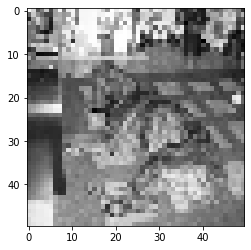

In [15]:
import matplotlib.pyplot as plt

plt.imshow(training_data[1][0], cmap = 'gray')
plt.show()

In [16]:
training_data[1][1]

array([0., 1.])